In [1]:
using Plots
using Images
using DifferentialEquations

In [2]:
function sir!(du, u, p, t)

    m, b, g, N = p

    S, I, R = u

    du[1] = -b * ((I * S) / N) - m * S + m * N
    du[2] = b * ((I * S) / N) - g * I - m * I
    du[3] = g * I - m * R

end

sir! (generic function with 1 method)

In [3]:
N = 9e6

n = 1  # número de infectados

1

In [4]:
u0 = [N - n, n, 0]

3-element Vector{Float64}:
 8.999999e6
 1.0
 0.0

In [5]:
tspan = (0.0, 100.0)

(0.0, 100.0)

In [6]:
p = (1.2, 1.5, 0.7, N)

(1.2, 1.5, 0.7, 9.0e6)

In [7]:
problema = ODEProblem(sir!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 100.0)
u0: 3-element Vector{Float64}:
 8.999999e6
 1.0
 0.0

In [8]:
sol_tot = solve(problema, PFRK87(), adaptive=false, dt = 0.1)

#así se accede a la solución obtenida
sol_u = sol_tot.u;

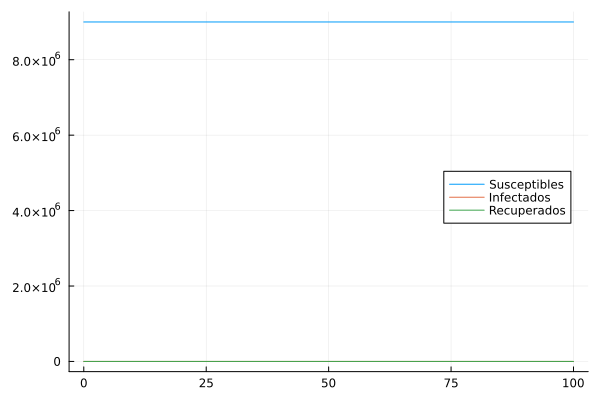

In [9]:
# y grafiquemos como

t_val = sol_tot.t 

sol_S = [u[1] for u in sol_tot.u]
sol_I = [u[2] for u in sol_tot.u]
sol_R = [u[3] for u in sol_tot.u];

plot(t_val, sol_S, label = "Susceptibles")
plot!(t_val, sol_I , label = "Infectados", key = :right)
plot!(t_val, sol_R , label = "Recuperados")

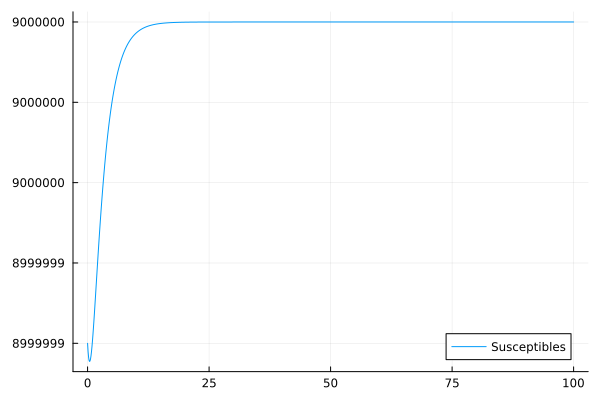

In [11]:
plot(t_val, sol_S, label = "Susceptibles")

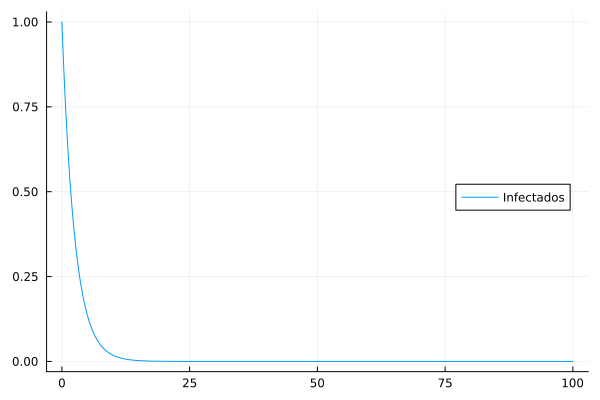

In [12]:
plot(t_val, sol_I , label = "Infectados", key = :right)

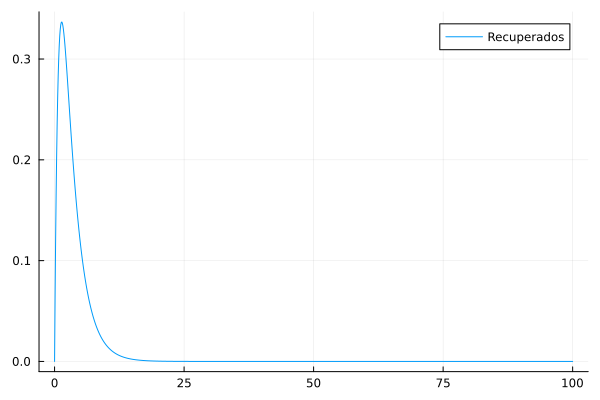

In [13]:

plot(t_val, sol_R , label = "Recuperados")

In [20]:
# fin de la clase